# TD - Data Types (3)
## Time series with pandas



# Import pandas & matplotlib


In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data
- Read "air_quality_no2_long.csv"
- Rename the column "date.utc" as "datetime"
- Print the first 5 lines
- Show the data type of each column

In [42]:
air_quality = pd.read_csv("air_quality_no2_long.csv")
air_quality.rename(columns={"date.utc": "datetime"}, inplace=True)

air_quality.head(5)

,city,country,datetime,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³


In [43]:
air_quality.dtypes

city          object
country       object
datetime      object
location      object
parameter     object
value        float64
unit          object
dtype: object

# Dataset exploration
- How many cities are in the dataset? (Which ones?)
- How many countries?
- How many locations?
- etc. 

In [44]:
air_quality.city.unique()

array(['Paris', 'Antwerpen', 'London'], dtype=object)

In [45]:
air_quality.country.unique()

array(['FR', 'BE', 'GB'], dtype=object)

In [46]:
air_quality.location.unique()

array(['FR04014', 'BETR801', 'London Westminster'], dtype=object)

In [47]:
air_quality.parameter.unique()

array(['no2'], dtype=object)

# Using pandas datetime properties

- Convert the datatime column to the ```datatime``` format
- Show the first and last date in the dataset
- Compute how many days are in the dataset

In [48]:
air_quality.datetime = pd.to_datetime(air_quality.datetime)

air_quality.datetime

0      2019-06-21 00:00:00+00:00
1      2019-06-20 23:00:00+00:00
2      2019-06-20 22:00:00+00:00
3      2019-06-20 21:00:00+00:00
4      2019-06-20 20:00:00+00:00
                  ...           
2063   2019-05-07 06:00:00+00:00
2064   2019-05-07 04:00:00+00:00
2065   2019-05-07 03:00:00+00:00
2066   2019-05-07 02:00:00+00:00
2067   2019-05-07 01:00:00+00:00
Name: datetime, Length: 2068, dtype: datetime64[ns, UTC]

In [49]:
(air_quality.datetime.iloc[0], air_quality.datetime.iloc[-1])

(Timestamp('2019-06-21 00:00:00+0000', tz='UTC'),
 Timestamp('2019-05-07 01:00:00+0000', tz='UTC'))

In [50]:
air_quality.datetime.iloc[0] - air_quality.datetime.iloc[-1]

Timedelta('44 days 23:00:00')

- Look at the documentation of __pandas.Series.dt__
- Add a column to the dataframe containing the month using ```dt```
- Using ```df.groupby```

In [51]:
air_quality["month"] = air_quality.datetime.dt.month

In [52]:
air_quality.head(5)

,city,country,datetime,location,parameter,value,unit,month
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³,6
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³,6
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³,6
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³,6
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³,6


# Data analysis
- What is the average concentration of $NO_{2}$ for each day of the week for each of the measurement locations? 
    - hint 1: ```groupby```
    - hint 2: ```dt.weekday```


In [53]:
air_quality["weekday"] = air_quality.datetime.dt.weekday
air_quality[["weekday", "location", "value"]].groupby(["weekday", "location"]).mean()

value
weekday location                     
0       BETR801             27.875000
        FR04014             24.856250
        London Westminster  23.969697
1       BETR801             22.214286
        FR04014             30.999359
        London Westminster  24.885714
2       BETR801             21.125000
        FR04014             29.165753
        London Westminster  23.460432
3       BETR801             27.500000
        FR04014             28.600690
        London Westminster  24.780142
4       BETR801             28.400000
        FR04014             31.617986
        London Westminster  26.446809
5       BETR801             33.500000
        FR04014             25.266154
        London Westminster  24.977612
6       BETR801             21.896552
        FR04014             23.274306
        London Westminster  24.859155

# Data visualization
- Plot the typical $NO_{2}$ pattern during the day of our time series of all stations together. In other words, what is the average value for each hour of the day?


<BarContainer object of 24 artists>

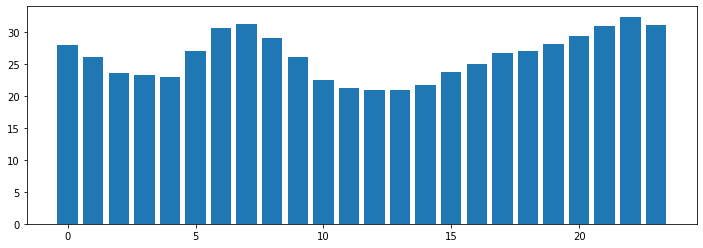

In [80]:
fig, axs = plt.subplots(figsize=(12, 4))

air_quality["hour"] = air_quality.datetime.dt.hour
data = air_quality[["hour", "value"]].groupby(["hour"]).mean()

axs.bar(data.index, data.value)

# Datetime as index
- Set the datetime column as index and reshape the data table with each of the measurements locations as a separate column (already done in the first cell)
- Working with a datetime index (i.e. DatetimeIndex) provides powerful functionalities. For example, we do not need the dt accessor to get the time series properties, but have these properties available on the index directly (already done in the second cell)
- **TODO**: Create a plot of the $NO_{2}$ values in the different stations from the 20th of May till the end of 21st of May

In [82]:
no_2 = air_quality.pivot(index="datetime", columns="location", values="value")

no_2.head()

location,BETR801,FR04014,London Westminster
datetime,,,
2019-05-07 01:00:00+00:00,50.5,25.0,23.0
2019-05-07 02:00:00+00:00,45.0,27.7,19.0
2019-05-07 03:00:00+00:00,NaN,50.4,19.0
2019-05-07 04:00:00+00:00,NaN,61.9,16.0
2019-05-07 05:00:00+00:00,NaN,72.4,NaN


In [106]:
no_2.index.year, no_2.index.weekday

location,BETR801,FR04014,London Westminster
datetime,,,
2019-05-07 01:00:00+00:00,50.5,25.0,23.0
2019-05-07 02:00:00+00:00,45.0,27.7,19.0
2019-05-07 03:00:00+00:00,NaN,50.4,19.0
2019-05-07 04:00:00+00:00,NaN,61.9,16.0
2019-05-07 05:00:00+00:00,NaN,72.4,NaN
...,...,...,...
2019-06-20 20:00:00+00:00,NaN,21.4,NaN
2019-06-20 21:00:00+00:00,NaN,24.9,NaN
2019-06-20 22:00:00+00:00,NaN,26.5,NaN


<AxesSubplot:xlabel='datetime'>

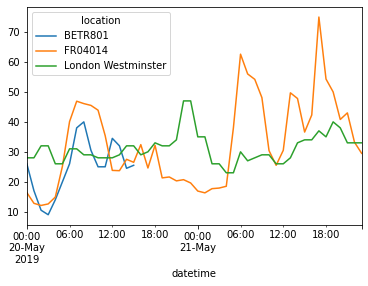

In [120]:
no_2[
    (no_2.index.month == 5) &
    (no_2.index.day >= 20) &
    (no_2.index.day <= 21)
].plot()

# Resample a time series to another frequency
- Aggregate the current hourly time series values to the monthly maximum value in each of the stations.
    - Hint use ```df.resample()```. 

A very powerful method on time series data with a datetime index, is the ability to ```resample()``` time series to another frequency (e.g., converting secondly data into 5-minutely data).

The ```resample()``` method is similar to a _groupby_ operation:
- it provides a time-based grouping, by using a string (e.g. M, 5H,…) that defines the target frequency
- it requires an aggregation function such as mean, max,…


In [129]:
monthly_max = no_2.resample("1m").max()
monthly_max

location,BETR801,FR04014,London Westminster
datetime,,,
2019-05-31 00:00:00+00:00,74.5,97.0,97.0
2019-06-30 00:00:00+00:00,52.5,84.7,52.0


In [127]:
monthly_max.index.freq

<MonthEnd>

- Make a plot of the daily $NO_{2}$ mean value in each of the stations (use ```resample()```)

<AxesSubplot:xlabel='datetime'>

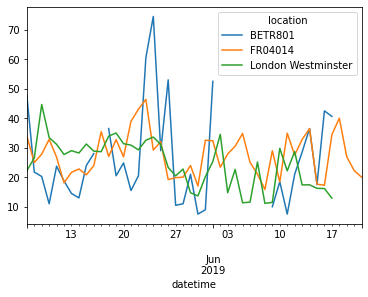

In [130]:
no_2.resample("1d").mean().plot()

## REMEMBER
- Valid date strings can be converted to datetime objects using ```to_datetime``` function or as part of read functions.
- Datetime objects in pandas support calculations, logical operations and convenient date-related properties using the ```dt``` accessor.
- A ```DatetimeIndex``` contains these date-related properties and supports convenient slicing.
- ```Resample``` is a powerful method to change the frequency of a time series.



_Inspiration and solution here: https://pandas.pydata.org/docs/getting_started/intro_tutorials/09_timeseries.html_